In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
url = '/content/drive/MyDrive/Dataset/'

In [5]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [6]:
import pandas as pd
data_labels = pd.read_csv('/content/training-a.csv', usecols = ['filename', 'digit'])

In [7]:
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
PATH = '/content/'

In [ ]:
TRAIN_PATH = url + 'Train_2'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  19702


# **Experminent1**

In [ ]:
#Batch Parameters
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:789
Test dataloader:197


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.302762508392334. Accuracy: 8.98477157360406
Epoch:  2
Iteration: 1000. Loss: 2.3043053150177. Accuracy: 9.67005076142132
Iteration: 1500. Loss: 2.3087687492370605. Accuracy: 8.98477157360406
Epoch:  3
Iteration: 2000. Loss: 2.3102004528045654. Accuracy: 8.98477157360406
Epoch:  4
Iteration: 2500. Loss: 2.2990500926971436. Accuracy: 9.898477157360405
Iteration: 3000. Loss: 2.30330228805542. Accuracy: 8.98477157360406
Epoch:  5
Iteration: 3500. Loss: 2.2998874187469482. Accuracy: 10.025380710659899
Epoch:  6
Iteration: 4000. Loss: 2.3004205226898193. Accuracy: 9.923857868020304
Iteration: 4500. Loss: 2.303591251373291. Accuracy: 9.949238578680204
Epoch:  7
Iteration: 5000. Loss: 2.298076629638672. Accuracy: 9.898477157360405
Iteration: 5500. Loss: 2.2990827560424805. Accuracy: 8.98477157360406
Epoch:  8
Iteration: 6000. Loss: 2.2984137535095215. Accuracy: 8.98477157360406
Epoch:  9
Iteration: 6500. Loss: 2.2997186183929443. Accuracy: 9.949238578680204
It

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/google colab/Assignment-2/model_base.pkl')


[2.302762508392334, 2.3043053150177, 2.3087687492370605, 2.3102004528045654, 2.2990500926971436, 2.30330228805542, 2.2998874187469482, 2.3004205226898193, 2.303591251373291, 2.298076629638672, 2.2990827560424805, 2.2984137535095215, 2.2997186183929443, 2.2966055870056152, 2.306957721710205, 2.2909510135650635, 2.2838661670684814, 2.2999370098114014, 2.289487361907959, 2.2797367572784424, 2.256779432296753, 2.255619764328003, 2.273759365081787, 2.1960830688476562, 2.1441211700439453, 2.1384050846099854, 2.0944061279296875, 2.819862127304077, 2.260526180267334, 2.09901762008667, 1.889609932899475]


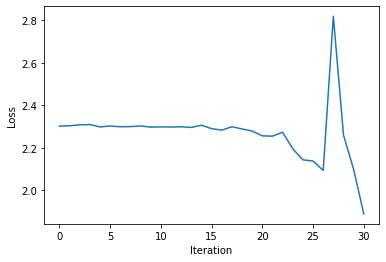

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **Experiment 2**

In [ ]:
#Batch Parameters
batch_size = 142
num_iters = 20000
input_dim = 28*28
num_hidden = 220
output_dim = 10

learning_rate = 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

144


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:111
Test dataloader:28


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

         

  
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=220, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=220, out_features=220, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=220, out_features=220, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=220, out_features=220, bias=True)
  (relu_4): ReLU()
  (linear_out): Linear(in_features=220, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Iteration: 500. Loss: 1.3280398845672607. Accuracy: 44.59390862944162
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Iteration: 1000. Loss: 0.7416069507598877. Accuracy: 68.98477157360406
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Iteration: 1500. Loss: 0.6250741481781006. Accuracy: 75.05076142131979
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Iteration: 2000. Loss: 0.35897165536880493. Accuracy: 78.68020304568527
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Iteration: 2500. Loss: 0.29209837317466736. Accuracy: 84.08629441624366
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Iteration: 3000. Loss: 0.30761244893074036. Accuracy: 86.21827411167513
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Iteration: 3500. Loss: 0.2073519229888916. Accuracy: 87.71573604060913
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Iteration: 4000. Loss: 0.23233045637607574. Accuracy: 88.57868020304568
Epoch:  38
Epoch:  39
Epoch:  4

[1.3280398845672607, 0.7416069507598877, 0.6250741481781006, 0.35897165536880493, 0.29209837317466736, 0.30761244893074036, 0.2073519229888916, 0.23233045637607574, 0.14154432713985443, 0.13551421463489532, 0.07751485705375671, 0.047529187053442, 0.06583356112241745, 0.07352792471647263, 0.04051690548658371, 0.04896106943488121, 0.11944548040628433, 0.05169488117098808, 0.018993869423866272, 0.006535348016768694, 0.016185373067855835, 0.00882173702120781, 0.030472325161099434, 0.01375720277428627, 0.009963889606297016, 0.05724349617958069, 0.06151114031672478, 0.01586131751537323, 0.009729638695716858, 0.012226930819451809, 0.006012659054249525]


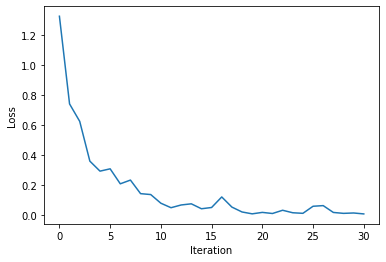

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()